In [ ]:
!pip install seaborn

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [ ]:
# !pip install datasets

In [ ]:
# from datasets import load_dataset

# dataset = load_dataset("stanfordnlp/sst2")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df = dataset['train'].to_pandas()
# df.to_csv("SST.csv", index=False)
df = pd.read_csv('wikipedia_512_pretraining.csv')
df.head(10)

,text
0,Herr's Potato Chips 200 The Herr's Potato Chi...
1,A second version follows the perimeter of the ...
2,"In the United States, ""undergraduate"" refers t..."
3,Bleach (season 2) The is the second season of...
4,Morrisby Profile The Morrisby Profile is an i...
5,Ibrahim Hassan (athlete) Ibrahim Hassan (born...
6,"The single ""Another Night"" produced by Alan Pa..."
7,Karmarama have featured in the Sunday Times Be...
8,"In the fall of 1888, the first school was buil..."
9,Those chapters were collected and published in...


In [ ]:
# df2 = df.copy()

## Basic EDA Information

In [ ]:
def basic_eda(df, row_limit=5, list_elements_limit=10):
    # Rows and columns
    print(f'Info: There are {df.shape[1]} columns and {df.shape[0]} rows in the dataset')
    print("==================================================")

    # Data types
    dtypes_df = df.dtypes.reset_index().rename(columns={0: 'dtype', 'index': 'column_name'})
    cat_df = dtypes_df[dtypes_df['dtype'] == 'object']
    num_df = dtypes_df[dtypes_df['dtype'] != 'object']

    print(f"\nData type information of different columns:\n"
          f"Info: There are {len(cat_df)} categorical columns\n"
          f"Info: There are {len(num_df)} numerical columns")

    print("Categorical columns:", list(cat_df['column_name'][:list_elements_limit]))
    print("Numerical columns:", list(num_df['column_name'][:list_elements_limit]))
    print()
    display(dtypes_df.head(row_limit))
    print("==================================================")

    # Description of numerical variables
    print("\nDescription of numerical variables")
    # Check if num_df is empty before proceeding
    if not num_df.empty:
        desc_df_num = df[list(num_df['column_name'])].describe().T.reset_index().rename(columns={'index': 'column_name'})
        display(desc_df_num.head(row_limit))
    else:
        print("No numerical columns found in the DataFrame.")
    print("==================================================")

    # Description of categorical variables
    print("\nDescription of categorical variables")
    desc_df_cat = df[list(cat_df['column_name'])].describe(include='all').T.reset_index().rename(
        columns={'index': 'column_name'})
    display(desc_df_cat.head(row_limit))

    return

In [ ]:
# Check the available columns in the DataFrame
print(df.columns)

# If 'label' column is not present, and it's named differently, update the code
# For example, if the column is named 'target':
# unique_labels = df["target"].unique()  # Replace 'target' with the actual column name

# Alternatively, if the CSV file is incorrect, load the correct CSV file
# df = pd.read_csv('correct_file.csv')  # Replace 'correct_file.csv' with the actual file name

Index(['text'], dtype='object')


In [ ]:
df.info()
print()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699666 entries, 0 to 6699665
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   text    object
dtypes: object(1)
memory usage: 51.1+ MB



text    0
dtype: int64

## Plotting Count vs Sentiments Bar Graph and Pie Chart with Percentages

In [ ]:
#df.label.value_counts().plot(kind='barh', title='Count (label)');

In [ ]:
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
# col='label'
# # Pie chart
# explode = np.array(df[col].value_counts(normalize=True).head(10)) * 0.1
# labels = df[col].value_counts().head(10).index.tolist()
# sizes = df[col].value_counts().head(10)

# ax2.pie(sizes, explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.9)
# ax2.add_artist(plt.Circle((0, 0), 0.6, fc='white'))
# ax2.set_title("Percentage of each emotion")

# # Bar plot
# sns.countplot(y=col, data=df, ax=ax1)
# ax1.set_title("Count of each emotion")

# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns
# import pandas as pd

# # Custom colors from the bar chart example
# colors = ['cadetblue', 'lightcoral']

# # Create figure and axes
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# # Pie chart
# col = 'label'
# explode = np.array(df[col].value_counts(normalize=True).head(10)) * 0.1
# labels = df[col].value_counts().head(10).index.tolist()
# sizes = df[col].value_counts().head(10)

# wedges, texts, autotexts = ax2.pie(
#     sizes,
#     explode=explode,
#     startangle=60,
#     labels=labels,
#     autopct='%1.0f%%',
#     pctdistance=0.85,
#     colors=sns.color_palette(colors, len(labels))
# )

# # Improve text properties
# for text in texts:
#     text.set_fontsize(12)
# for autotext in autotexts:
#     autotext.set_fontsize(12)
#     autotext.set_color('black')
#     autotext.set_weight('bold')

# # Add a circle at the center to make it a donut chart
# centre_circle = plt.Circle((0, 0), 0.6, fc='white')
# ax2.add_artist(centre_circle)

# # Equal aspect ratio ensures that pie is drawn as a circle
# ax2.axis('equal')

# ax2.set_title("Percentage of Each Emotion", fontsize=14)

# # Bar plot
# sns.countplot(y=col, data=df, ax=ax1, palette=colors)
# ax1.set_title("Count of Each Emotion", fontsize=14)

# # Adjust layout
# plt.tight_layout()

# plt.show()

100%|█████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 3222817.80it/s]


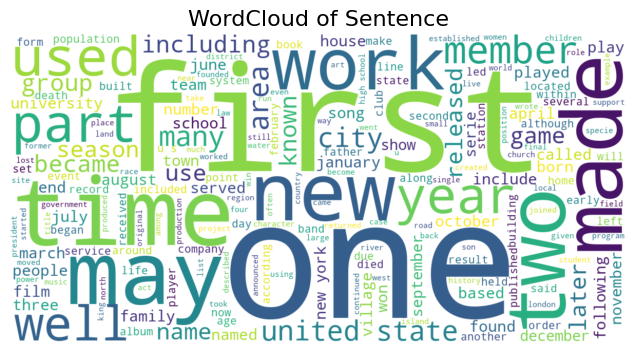

In [ ]:
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Stopwords set
stopwords = set(STOPWORDS)

# Function to plot wordcloud with progress bar
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=1200, height=600, background_color='white', stopwords=stopwords, min_font_size=10).generate(text)

    plt.figure(figsize=(12, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Concatenate text from the DataFrame with progress bar
text_data = []
for text in tqdm(df['text'][:100000].str.lower()):
    text_data.append(text)

# Join all texts into a single string
final_text = ' '.join(text_data)

# Plot wordcloud
plot_wordcloud(final_text, 'WordCloud of Sentence')


## Character Length Analysis

In [ ]:
df['text_length'] = df['text'].str.len()
print(df[['text', 'text_length']])

                                                      text  text_length
0        Herr's Potato Chips 200  The Herr's Potato Chi...          414
1        A second version follows the perimeter of the ...          293
2        In the United States, "undergraduate" refers t...         2838
3        Bleach (season 2)  The is the second season of...         2091
4        Morrisby Profile  The Morrisby Profile is an i...         2211
...                                                    ...          ...
6699661  Ridden for the first time by Hiroyuki Uchida, ...         2290
6699662  1986 Hawaii gubernatorial election  The 1986 H...          594
6699663  Jorge Giacinti  Jorge Alberto Giacinti (born J...          126
6699664  Kożuchowski Młyn  Kożuchowski Młyn () is a set...          293
6699665  Ministry of Justice (Yugoslavia)  The Ministry...          383

[6699666 rows x 2 columns]


In [ ]:
df

,text,text_length
0,Herr's Potato Chips 200 The Herr's Potato Chi...,414
1,A second version follows the perimeter of the ...,293
2,"In the United States, ""undergraduate"" refers t...",2838
3,Bleach (season 2) The is the second season of...,2091
4,Morrisby Profile The Morrisby Profile is an i...,2211
...,...,...
6699661,"Ridden for the first time by Hiroyuki Uchida, ...",2290
6699662,1986 Hawaii gubernatorial election The 1986 H...,594
6699663,Jorge Giacinti Jorge Alberto Giacinti (born J...,126
6699664,Kożuchowski Młyn Kożuchowski Młyn () is a set...,293


<Axes: ylabel='Frequency'>

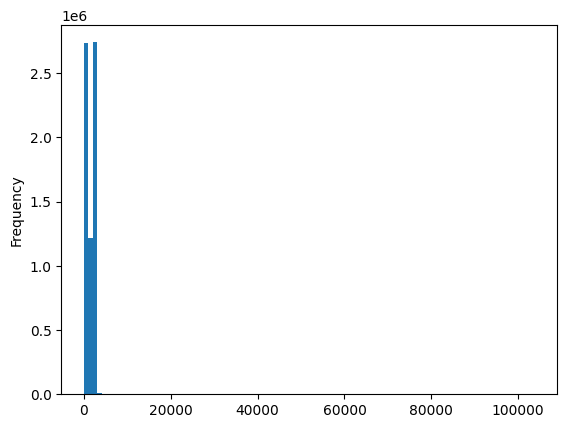

In [ ]:
#showing the distribution of length
df['text_length'].plot(bins=100, kind ='hist')

In [ ]:
sentence_length_list = df['text_length'].tolist()

In [ ]:
print("min=",min(sentence_length_list))
print("max=",max(sentence_length_list))

min= 6
max= 103794


In [ ]:
rows_with_length_2 = df[df['text_length'] == 6]
rows_with_length_2

,text,text_length
4815,Notes:,6
6604,Atiaka,6
37620,Chunaw,6
47609,Gōzoku,6
60327,Gêding,6
...,...,...
6664703,OVWIAN,6
6666269,Voigny,6
6666637,Couret,6
6681410,Dobřeň,6


In [ ]:
rows_with_length_268 = df[df['text_length'] == 103794]
rows_with_length_268

,text,text_length
1043481,Index of Telangana-related articles This is a...,103794


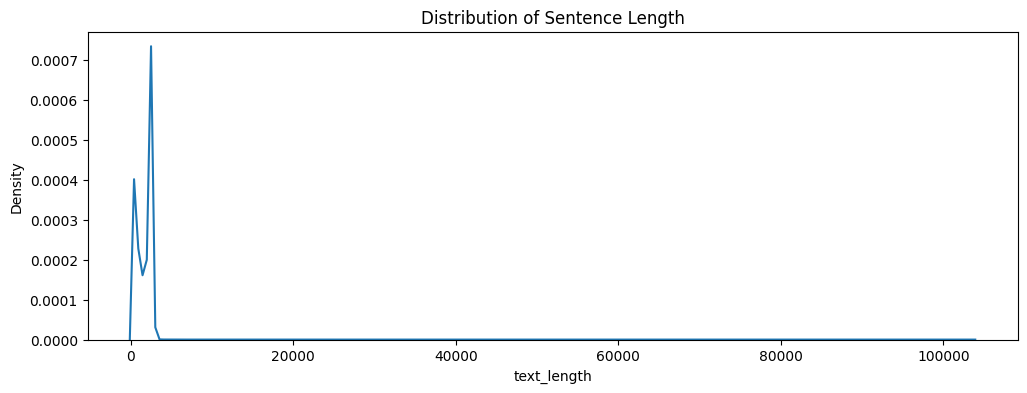

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 4))
sns.kdeplot(df['text_length'], ax=ax)  # Plot distribution of text_length
ax.set_title("Distribution of Sentence Length")
plt.show()

## Word Length Analysis

100%|█████████████████████████████████████████████████████████████████████| 6699666/6699666 [01:09<00:00, 95822.07it/s]


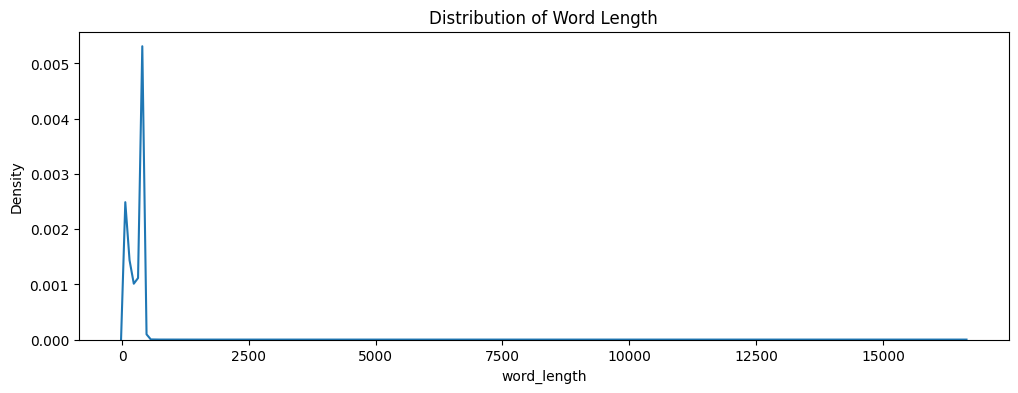

In [ ]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

tqdm.pandas()  # Enable tqdm for pandas apply

df['word_length'] = df['text'].progress_apply(lambda x: len(x.split(" ")))

fig, ax = plt.subplots(figsize=(12, 4))
sns.kdeplot(df['word_length'], ax=ax)
ax.set_title("Distribution of Word Length")
plt.show()

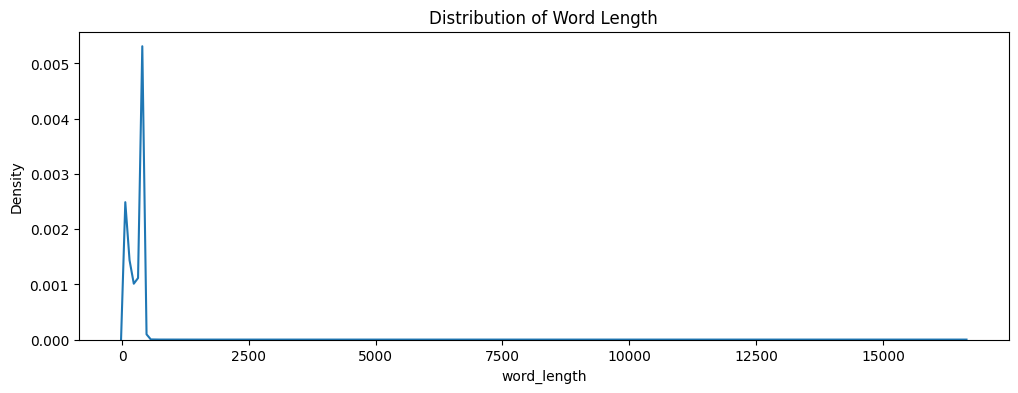

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 4))
sns.kdeplot(df['word_length'], ax=ax)  # Plot distribution of word_length
ax.set_title("Distribution of Word Length")
plt.show()

#### Word average length

In [ ]:
def average_word_length(sentence):
    words = sentence.split()
    word_lengths = [len(word) for word in words]
    return sum(word_lengths) / len(word_lengths) if len(word_lengths) > 0 else 0

# Add a new column with average word length
df['average_word_length'] = df['text'].apply(average_word_length)

In [ ]:
df

,text,text_length,word_length,average_word_length
0,Herr's Potato Chips 200 The Herr's Potato Chi...,414,74,4.671233
1,A second version follows the perimeter of the ...,293,48,5.125000
2,"In the United States, ""undergraduate"" refers t...",2838,431,5.587007
3,Bleach (season 2) The is the second season of...,2091,351,4.974286
4,Morrisby Profile The Morrisby Profile is an i...,2211,336,5.600000
...,...,...,...,...
6699661,"Ridden for the first time by Hiroyuki Uchida, ...",2290,400,4.727500
6699662,1986 Hawaii gubernatorial election The 1986 H...,594,92,5.588889
6699663,Jorge Giacinti Jorge Alberto Giacinti (born J...,126,21,5.300000
6699664,Kożuchowski Młyn Kożuchowski Młyn () is a set...,293,44,5.952381


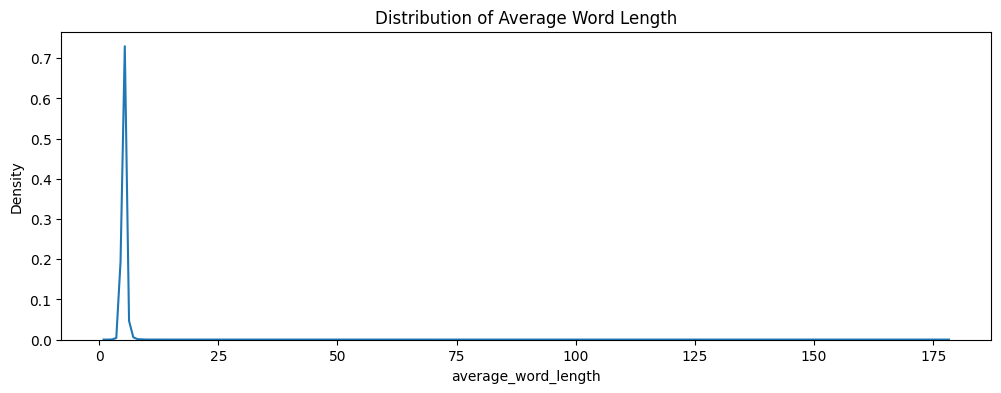

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 4))
# Plot distribution of average word length for the entire dataset
sns.kdeplot(df['average_word_length'], ax=ax)
ax.set_title("Distribution of Average Word Length")
plt.show()

In [ ]:
df['serial_number'] = df.reset_index().index

In [ ]:
df

,idx,sentence,label,sentence_length,word_length,average_word_length,serial_number
0,0,hide new secretions from the parental units,0,44,8,5.285714,0
1,1,"contains no wit , only labored gags",0,36,8,4.142857,1
2,2,that loves its characters and communicates som...,1,89,13,6.416667,2
3,3,remains utterly satisfied to remain the same t...,0,56,9,6.000000,3
4,4,on the worst revenge-of-the-nerds clichés the ...,0,73,11,6.300000,4
...,...,...,...,...,...,...,...
67344,67344,a delightful comedy,1,20,4,5.666667,67344
67345,67345,"anguish , anger and frustration",0,32,6,5.400000,67345
67346,67346,"at achieving the modest , crowd-pleasing goals...",1,66,12,5.000000,67346
67347,67347,a patient viewer,1,17,4,4.666667,67347


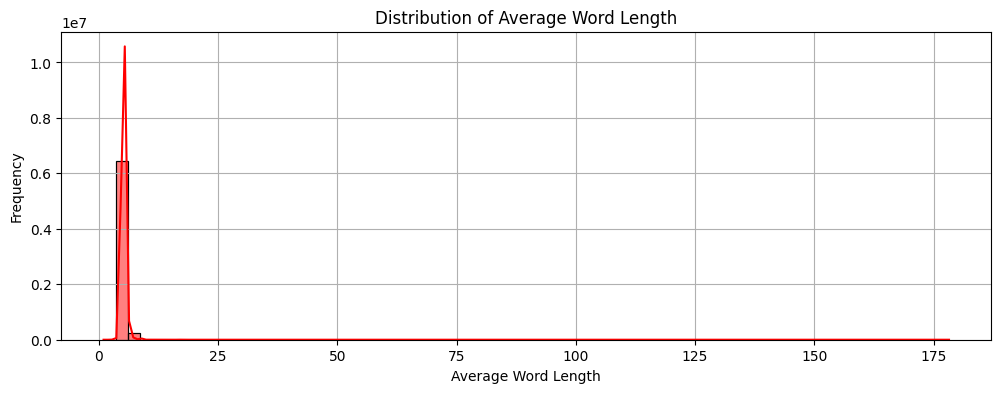

In [ ]:
# Assuming df is your DataFrame with the 'average_word_length' column
plt.figure(figsize=(12, 4))
sns.histplot(df['average_word_length'], bins=70, color='red', edgecolor='black', kde=True)
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Word Length')
plt.grid(True)
plt.show()

## Stopwords Analysis

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus=[]
new= df['sentence'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
# print(dic)
for word in corpus:
    if word in stop:
        dic[word]+=1

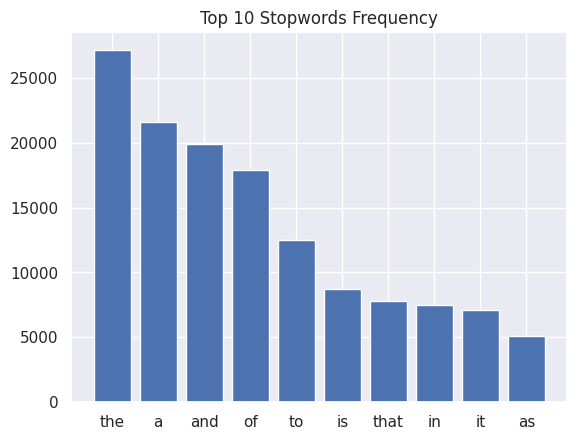

In [ ]:
#plt.figure(figsize=(8, 8))
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)
plt.title("Top 10 Stopwords Frequency")
plt.show()

We can evidently see that stopwords such as “to”,” in” and “the” dominate in our dataset

So now we know which stopwords occur frequently in our text, let’s inspect which words other than these stopwords occur frequently.

# Uni grams

In [ ]:
# Code Snippet for Top N-grams Barchart

import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=1):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

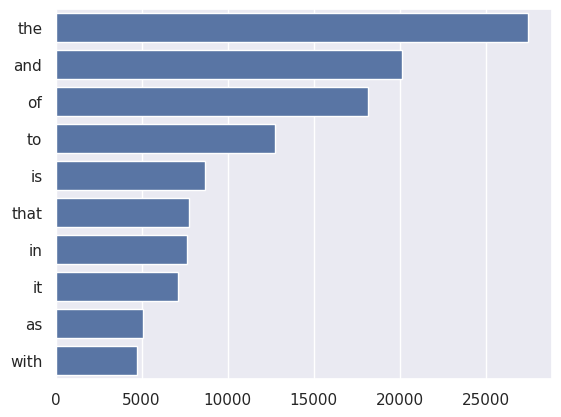

In [ ]:
plot_top_ngrams_barchart(df['sentence'],1)

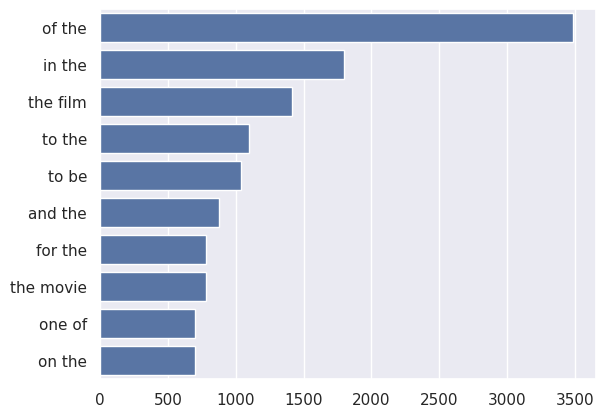

In [ ]:
plot_top_ngrams_barchart(df['sentence'],2)

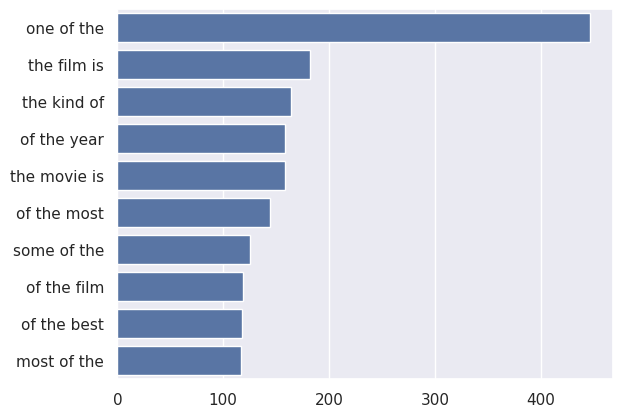

In [ ]:
plot_top_ngrams_barchart(df['sentence'],3)

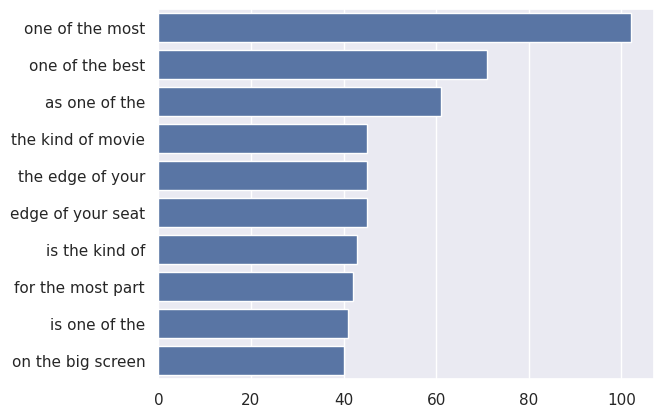

In [ ]:
plot_top_ngrams_barchart(df['sentence'],4)

In [ ]:
!pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
   ---- ----------------------------------- 2.1/19.1 MB 7.3 MB/s eta 0:00:03
   -------------------------------- ------- 15.5/19.1 MB 33.6 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 36.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.express as px
from collections import Counter
import re
from tqdm import tqdm

# # Load your dataset
# df = pd.read_csv('wikipedia_512_pretraining.csv')

# Preprocess text (tokenize and clean)
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply tqdm progress bar to text processing
tqdm.pandas()
df['processed_text'] = df['text'].progress_apply(preprocess_text)

# Tokenize and calculate word frequencies
words = ' '.join(df['processed_text']).split()
word_freq = Counter(words)

# Convert to a DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)



Output hidden; open in https://colab.research.google.com to view.

In [44]:
# Visualize the top N most common words
import plotly.io as pio
pio.renderers.default = 'colab'

fig = px.bar(word_freq_df.head(20), x='word', y='frequency', title='Top 20 Most Common Words')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
from tqdm import tqdm

# Apply tqdm progress bar to text length calculation
tqdm.pandas()
df['text_length'] = df['text'].progress_apply(len)

# Visualize text length distribution
fig = px.histogram(df, x='text_length', nbins=50, title='Text Length Distribution')
fig.show()


In [45]:
# Visualize text length distribution
import plotly.io as pio
pio.renderers.default = 'colab'
fig = px.histogram(df, x='text_length', nbins=50, title='Text Length Distribution')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
import plotly.express as px
from tqdm import tqdm

# Apply tqdm progress bar to word count calculation
tqdm.pandas()
df['word_count'] = df['text'].progress_apply(lambda x: len(x.split()))

# Visualize word count distribution
fig = px.histogram(df, x='word_count', nbins=50, title='Word Count Distribution')
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [46]:
import plotly.io as pio
pio.renderers.default = 'colab'
fig = px.histogram(df, x='word_count', nbins=50, title='Word Count Distribution')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [48]:
import pandas as pd
import plotly.express as px
from tqdm import tqdm
import plotly.io as pio
pio.renderers.default = 'colab'
# Apply tqdm progress bar to word count calculation
tqdm.pandas()
df['word_count'] = df['text'].progress_apply(lambda x: len(x.split()))

# Create a plot with index on x-axis and word count on y-axis
df['index'] = df.index  # Create an 'index' column from the DataFrame's index

# Visualize word count vs index
fig = px.scatter(df, x='index', y='word_count', title='Word Count per Index')
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import plotly.io as pio
pio.renderers.default = 'colab'
# Apply tqdm progress bar to text processing
tqdm.pandas()
df['processed_text'] = df['text'][:10000.].progress_apply(lambda x: ' '.join(re.sub(r'\W+', ' ', x).lower().split()))

# Generate a word cloud from the processed text
words = ' '.join(df['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
